# Group Final Project

# **Introduction**

# 1. Frame the problem and look at the big picture

# 2. Get the data

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

app_train_raw = pd.read_csv('./data/application_train.csv')

# 3. Explore the data to gain insights

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

## 4.1 Drop rows which contain NaN

In [2]:
app_train_raw = app_train_raw.set_index('SK_ID_CURR')

### 砍 columns

In [3]:
def drop_column_by_na(df, threshold=None):
    if not threshold:
         threshold = int(df.shape[0]/3)
    na = df.isna().sum().sort_values(ascending = False)
    display(Markdown('**Drop Columns:**'))
    for name, val in na.items():
        if val >= threshold:
            print(name, end=',')
            df.drop(columns=[name], inplace = True)

drop_column_by_na(app_train_raw)

**Drop Columns:**

COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,FONDKAPREMONT_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MODE,BASEMENTAREA_MEDI,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,HOUSETYPE_MODE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,

### 刪除包含 NaN 的 rows

In [4]:
app_train_dropped = app_train_raw.dropna()
display(Markdown(f'**Shape of dataset after dropping rows that contain NaN: {app_train_dropped.shape}**'))

**Shape of dataset after dropping rows that contain NaN: (167732, 72)**

### 刪除性別欄位 CODE_GENDER 值為 XNA 的 rows

In [5]:
app_train_dropped = app_train_dropped[app_train_dropped['CODE_GENDER'] != 'XNA']

### 分出特征集 X 和目標標籤 y

In [6]:
app_train_dropped_y = app_train_dropped['TARGET']
app_train_dropped_X = app_train_dropped.drop(columns=['TARGET'])

### 將資料集切割成 training set 和 testing set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(app_train_dropped_X, app_train_dropped_y, test_size=0.3, random_state=42)
display(Markdown(f'**- X_train\'s shape: {X_train.shape}**'))
display(Markdown(f'**- y_train\'s shape: {y_train.shape}**'))
display(Markdown(f'**- X_test\'s shape: {X_test.shape}**'))
display(Markdown(f'**- y_test\'s shape: {y_test.shape}**'))

**- X_train's shape: (117411, 71)**

**- y_train's shape: (117411,)**

**- X_test's shape: (50319, 71)**

**- y_test's shape: (50319,)**

## Data Standardization (for numerical data) and One-hot encoding (for categorical data)

In [8]:
X_test.isna().sum().sort_values(ascending=False)

AMT_REQ_CREDIT_BUREAU_YEAR     0
OCCUPATION_TYPE                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
DAYS_REGISTRATION              0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
DAYS_ID_PUBLISH                0
DAYS_EMPLOYED                  0
REG_CITY_NOT_LIVE_CITY         0
AMT_ANNUITY                    0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
DAYS_BIRTH                     0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
          

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
binaryDataColumns = [col for col in X_train if np.isin(X_train[col].unique(), [0, 1]).all()]
numericalDataColumns = [col for col in X_train.columns if col not in binaryDataColumns and col not in categorical_columns]
categoricalData_train, categoricalData_test = X_train[categorical_columns], X_test[categorical_columns]
binaryData_train, binaryData_test = X_train[binaryDataColumns], X_test[binaryDataColumns]
numericalData_train, numericalData_test = X_train[numericalDataColumns], X_test[numericalDataColumns]

def one_hot_encoder(df_train, df_test):
    df_train_index = df_train.index
    df_test_index = df_test.index
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    df_train = pd.DataFrame(ohe.fit_transform(df_train), columns=ohe.get_feature_names(), index=df_train_index)
    df_test = pd.DataFrame(ohe.transform(df_test), columns=ohe.get_feature_names(), index=df_test_index)
    return df_train, df_test

display(Markdown(f'**Before One-hot encoding:**'))
display(Markdown(f'**- X_train categorical data\'s shape: {categoricalData_train.shape}**'))
display(Markdown(f'**- X_test categorical data\'s shape: {categoricalData_test.shape}**'))
categoricalData_train, categoricalData_test = one_hot_encoder(categoricalData_train, categoricalData_test)
display(Markdown(f'**After One-hot encoding:**'))
display(Markdown(f'**- X_train categorical data\'s shape: {categoricalData_train.shape}**'))
display(Markdown(f'**- X_test categorical data\'s shape: {categoricalData_test.shape}**'))

def standardization(df_train, df_test):
    df_train_index = df_train.index
    df_test_index = df_test.index
    scaler = StandardScaler()
    df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=numericalDataColumns, index=df_train_index)
    df_test = pd.DataFrame(scaler.transform(df_test), columns=numericalDataColumns, index=df_test.index)
    return df_train, df_test

display(Markdown(f'**Before standardization:**'))
display(Markdown(f'**- X_train numerical data\'s head(3):**'))
display(numericalData_train.head(3))
display(Markdown(f'**- X_test numerical data\'s head(3):**'))
display(numericalData_test.head(3))
numericalData_train, numericalData_test = standardization(numericalData_train, numericalData_test)
display(Markdown(f'**After standardization:**'))
display(Markdown(f'**- X_train numerical data\'s head(3):**'))
display(numericalData_train.head(3))
display(Markdown(f'**- X_test numerical data\'s head(3):**'))
display(numericalData_test.head(3))

**Before One-hot encoding:**

**- X_train categorical data's shape: (117411, 12)**

**- X_test categorical data's shape: (50319, 12)**

**After One-hot encoding:**

**- X_train categorical data's shape: (117411, 119)**

**- X_test categorical data's shape: (50319, 119)**

**Before standardization:**

**- X_train numerical data's head(3):**

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
423876,0,225000.0,180000.0,9000.0,180000.0,0.009630,-15704,-7008,-8368.0,-4283,...,0.0,0.0,0.0,-1015.0,0.0,0.0,0.0,0.0,0.0,2.0
364563,2,315000.0,157500.0,16960.5,157500.0,0.072508,-15552,-1577,-8733.0,-4624,...,0.0,0.0,0.0,-408.0,0.0,0.0,0.0,0.0,0.0,3.0
397002,1,180000.0,917140.5,46957.5,805500.0,0.020713,-11459,-519,-3111.0,-3462,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**- X_test numerical data's head(3):**

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
319636,0,112500.0,225000.0,13045.5,225000.0,0.030755,-14217,-2621,-4417.0,-4421,...,0.0,1.0,0.0,-1594.0,0.0,0.0,0.0,0.0,0.0,1.0
226750,0,202500.0,545040.0,36553.5,450000.0,0.010147,-16187,-1238,-959.0,-1181,...,0.0,0.0,0.0,-294.0,0.0,0.0,0.0,0.0,0.0,1.0
307689,2,148500.0,1006920.0,42790.5,900000.0,0.035792,-14838,-4857,-7309.0,-4830,...,0.0,1.0,0.0,-3355.0,0.0,0.0,0.0,0.0,1.0,3.0


**After standardization:**

**- X_train numerical data's head(3):**

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
423876,-0.665432,0.127460,-1.079335,-1.302826,-1.007892,-0.814100,-0.231679,-1.893769,-1.152044,-0.939145,...,-0.315153,-0.568833,-0.270642,-0.008301,-0.075914,-0.060747,-0.170569,-0.300715,-0.426944,0.077447
364563,1.926128,0.378915,-1.134366,-0.754310,-1.067871,3.842681,-0.189449,0.373570,-1.264624,-1.166518,...,-0.315153,-0.568833,-0.270642,0.718242,-0.075914,-0.060747,-0.170569,-0.300715,-0.426944,0.628343
397002,0.630348,0.001733,0.723594,1.312628,0.659512,0.006713,0.947721,0.815264,0.469422,-0.391715,...,-0.315153,0.236959,-0.270642,1.206594,-0.075914,-0.060747,-0.170569,0.740612,-0.426944,-1.024346


**- X_test numerical data's head(3):**

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
319636,-0.665432,-0.186858,-0.969272,-1.024072,-0.887935,0.750429,0.181458,-0.062280,0.066600,-1.031161,...,-0.315153,-0.165937,-0.270642,-0.701330,-0.075914,-0.060747,-0.170569,-0.300715,-0.426944,-0.473450
226750,-0.665432,0.064597,-0.186505,0.595742,-0.288149,-0.775811,-0.365873,0.515096,1.133184,1.129219,...,-0.315153,-0.568833,-0.270642,0.854693,-0.075914,-0.060747,-0.170569,-0.300715,-0.426944,-0.473450
307689,1.926128,-0.086276,0.943180,1.025502,0.911422,1.123472,0.008924,-0.995767,-0.825406,-1.303876,...,-0.315153,-0.165937,-0.270642,-2.809143,-0.075914,-0.060747,-0.170569,-0.300715,1.239100,0.628343


### 合併回完整的 X_train 和 X_test

In [10]:
X_train = pd.concat([numericalData_train, binaryData_train, categoricalData_train], axis=1)
X_test = pd.concat([numericalData_test, binaryData_test, categoricalData_test], axis=1)

### 處理 protected attributes

In [11]:
def processProtectedAttributes(df):
    df['age_lt0'] = np.zeros(df.shape[0])
    df['education'] = np.zeros(df.shape[0])
    df['GENDER_F'] = np.zeros(df.shape[0])
    df['GENDER_M'] = np.zeros(df.shape[0])
    
    df.loc[df['DAYS_BIRTH'] >= 0, 'age_lt0'] = 1
    df.loc[df['DAYS_BIRTH'] < 0, 'age_lt0'] = 0

    df.loc[df['x6_Academic degree'] > 0.5, 'education'] = 1
    df.loc[df['x6_Higher education'] > 0.5, 'education'] = 1
    df.loc[df['x6_Incomplete higher'] > 0.5, 'education'] = 0
    df.loc[df['x6_Lower secondary'] > 0.5, 'education'] = 0
    df.loc[df['x6_Secondary / secondary special'] > 0.5, 'education'] = 0

    df.loc[df['x1_F'] > 0.5, 'GENDER_F'] = 1
    df.loc[df['x1_M'] > 0.5, 'GENDER_M'] = 1

    df = df.drop('DAYS_BIRTH', axis=1)
    df = df.drop('x6_Academic degree', axis=1)
    df = df.drop('x6_Higher education', axis=1)
    df = df.drop('x6_Incomplete higher', axis=1)
    df = df.drop('x6_Lower secondary', axis=1)
    df = df.drop('x6_Secondary / secondary special', axis=1)
    df = df.drop('x1_F', axis=1)
    df = df.drop('x1_M', axis=1)
    
    return df

X_train = processProtectedAttributes(X_train)
X_test = processProtectedAttributes(X_test)

### 將 JSON 格式的 column name 以底線取代冒號與空白

In [12]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test.columns]

In [13]:
display(Markdown(f'**After processing bias features:**'))
display(Markdown(f'**- X_train\'s shape: {X_train.shape}**'))
display(Markdown(f'**- X_test\'s shape: {X_test.shape}**'))

**After processing bias features:**

**- X_train's shape: (117411, 174)**

**- X_test's shape: (50319, 174)**

### **The dataset is imbalanced!**

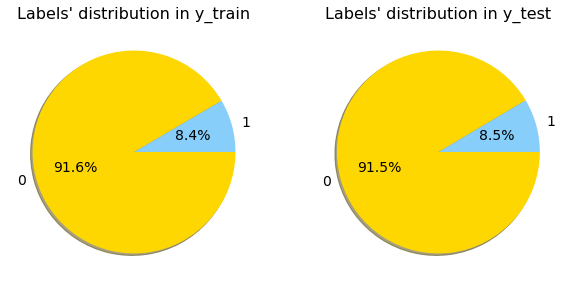

In [14]:
from collections import Counter

labels = [1, 0]
train_counter = Counter(y_train)
train_values = [train_counter[1], train_counter[0]]
test_counter = Counter(y_test)
test_values = [test_counter[1], test_counter[0]]
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax1, ax2 = ax.flatten()
ax1.pie(train_values, labels=labels, autopct='%1.1f%%', shadow=True, colors=['lightskyblue', 'gold'], textprops={'fontsize': 14})
ax1.set_title('Labels\' distribution in y_train', fontsize=16)
ax2.pie(test_values, labels=labels, autopct='%1.1f%%', shadow=True, colors=['lightskyblue', 'gold'], textprops={'fontsize': 14})
ax2.set_title('Labels\' distribution in y_test', fontsize=16)
plt.show()

### 如上圖所見，就`y_train` 和 `y_test` 中的 `1` 和 `0` 分佈狀況而言，很明顯地 `0` 佔了**九**成的數量，而 `1` 只有不到**一**成的數量。這是一個不平衡的資料集。

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

binaryDataColumns = [col for col in X_train if np.isin(X_train[col].unique(), [0, 1]).all()]
binaryDataColumnIndex = [X_train.columns.get_loc(col) for col in binaryDataColumns]

# define pipeline
# sampling_strategy=0.1: 10% the number of examples of the majority class
over = SMOTENC(categorical_features=binaryDataColumnIndex, sampling_strategy=0.1)
under = TomekLinks()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_over_under, y_train_over_under = pipeline.fit_resample(X_train, y_train)

In [ ]:
X_train_over_under.shape, y_train_over_under.shape, X_test.shape, y_test.shape

In [ ]:
y_train_over_under = pd.DataFrame(y_train_over_under, columns=['TARGET'])
y_test = pd.DataFrame(y_test, columns=['TARGET'])

X_train_over_under.to_csv('X_train.csv')
y_train_over_under.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

---

# **Task 1**

# 5. Explore many different models and short-list the best ones

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier import ROCAUC

def predictedEvaluation(model, X_test, y_test):
    # Predictions on the test dataset
    predicted = pd.DataFrame(model.predict(X_test))
    # Probabilities on the test dataset
    probs = pd.DataFrame(model.predict_proba(X_test))
    
    # Store metrics    
    roc_auc = metrics.roc_auc_score(y_test, probs[1])
    accuracy = metrics.accuracy_score(y_test, predicted)
    precision_0 = metrics.precision_score(y_test, predicted, pos_label=0)
    recall_0 = metrics.recall_score(y_test, predicted, pos_label=0)
    f1_0 = metrics.f1_score(y_test, predicted, pos_label=0)
    precision_1 = metrics.precision_score(y_test, predicted, pos_label=1)
    recall_1 = metrics.recall_score(y_test, predicted, pos_label=1)
    f1_1 = metrics.f1_score(y_test, predicted, pos_label=1)
    
    print('roc_auc:', roc_auc)
    
    visualizer = ConfusionMatrix(model, support=True)
    visualizer.score(X_test, y_test)
    visualizer.show()    

    visualizer = ClassificationReport(model, support=True)
    visualizer.score(X_test, y_test)
    visualizer.show()
        
    visualizer = ClassPredictionError(model)
    visualizer.score(X_test, y_test)
    
    visualizer = PrecisionRecallCurve(model)
    visualizer.score(X_test, y_test)
    
    visualizer = ROCAUC(model)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return roc_auc, accuracy, precision_0, recall_0, f1_0, precision_1, recall_1, f1_1

In [ ]:
X_train = X_train_over_under.copy()
y_train = y_train_over_under['TARGET'].copy()
X_test = X_test.copy()
y_test = y_test['TARGET'].copy()

In [ ]:
X_test.isna().sum().sort_values(ascending=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model = LR_model.fit(X_train, y_train)
LR_result = predictedEvaluation(LR_model, X_test, y_test.values.reshape(-1,1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(X_train, y_train)
RF_result = predictedEvaluation(RF_model, X_test, y_test.values.reshape(-1,1))

In [ ]:
from lightgbm import LGBMClassifier
LGBM_model = LGBMClassifier()
LGBM_model = RF_model.fit(X_train, y_train)
LGBM_result = predictedEvaluation(LGBM_model, X_test, y_test.values.reshape(-1,1))

In [ ]:
records = [
    LR_result,
    RF_result,
    LGBM_result,
]
indices = [
    'Logistic Regression',
    'Random Forest Classifier',
    'LightGBM Classifier'
]
metricColumns = ['ROC_AUC', 'Accuracy', 'Precision (label 0)', 'Recall (label 0)', 'F1 (label 0)', 'Precision (label 1)', 'Recall (label 1)', 'F1 (label 1)']
summary = pd.DataFrame(records, index=indices, columns=metricColumns)
summary

## XGboost

# 6. Fine-tune your models and combine them into a great solution

In [ ]:
def gridSearch(model, params, X, y):
    # define grid search
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=cv, scoring='roc_auc', error_score='raise')
    grid_result = grid_search.fit(X, y)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    
    return grid_result

# 7. Present your solution